In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
#from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix, multilabel_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
import itertools



In [41]:
def plot_confusion_matrix(ax: plt.Axes, cnf_matrix: np.ndarray, classes_names: list, normalize: bool = False):
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=CMAP)

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), horizontalalignment="center")
 
    
    
    
    
def plot_roc_chart(ax: plt.Axes, models: dict, tstX, tstY, target: str='class'):
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s'%target)
    ax.plot([0, 1], [0, 1], color='navy', label='random', linestyle='--')
    
    for clf in models:
        scores = models[clf].predict_proba(tstX)[:,1]
        fpr, tpr, _ = metrics.roc_curve(tstY, scores,  pos_label=1)
        roc_auc = metrics.roc_auc_score(tstY, scores)
        ax.plot(fpr, tpr, label='%s (auc=%0.2f)' %(clf, roc_auc))
    ax.legend(loc="lower center")





Initial shape: (376, 100)
Accuracy: 0.8
Specificity:  0.84
Sensitivity:  0.75


<Figure size 432x288 with 0 Axes>

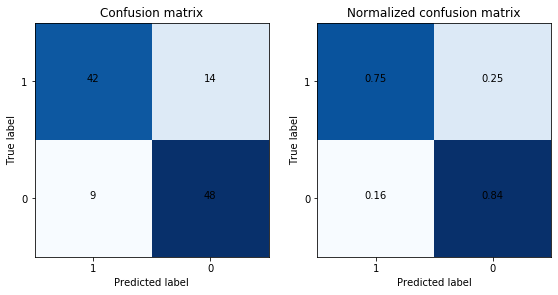

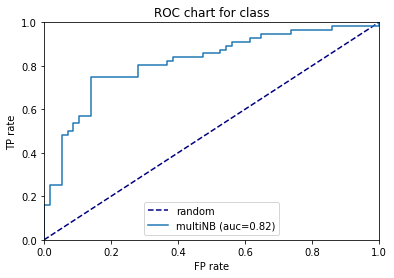

In [77]:
#resultAfterSMOTE.csv
#resultKBest
#resultETC.csv
from sklearn.preprocessing import MinMaxScaler


PDdata = pd.read_csv('resultKBest.csv', sep=',')
#print(PDdata)
X = PDdata.drop(columns=['class'])
y = PDdata['class'].values





print("Initial shape: "+str(X.shape))
X = MinMaxScaler().fit_transform(X)

X = pd.DataFrame(X)


labels = pd.unique(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None, stratify=y)


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

gaussNB = MultinomialNB()
gaussNB.fit(X_train, y_train)
y_predict = gaussNB.predict(X_test)

acu = accuracy_score(y_test, y_predict)
print("Accuracy:", round(acu,2))
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", round(specificity,2))
sensitivity = tp / (tp + fn)
print("Sensitivity: ", round(sensitivity,2))


plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)
cnf_mtx: np.ndarray = metrics.confusion_matrix(y_test, y_predict, labels)
CMAP = plt.cm.Blues
plot_confusion_matrix(axs[0,0], cnf_mtx, labels)
plot_confusion_matrix(axs[0,1], metrics.confusion_matrix(y_test, y_predict, labels), labels, normalize=True)
plt.tight_layout()
plt.show()
plt.figure()
plot_roc_chart(plt.gca(), {'multiNB': gaussNB}, X_test, y_test, 'class')
plt.show()

In [ ]:
# 2nd dataset

In [94]:



from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB


gaussNB = MultinomialNB()
gaussNB.fit(X_train, y_train)
y_predict = gaussNB.predict(X_test)

acu = accuracy_score(y_test, y_predict)
print("Accuracy:", round(acu,2))
cm = confusion_matrix(y_test, y_predict).ravel()


import matplotlib.pyplot as plt
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_predict).ravel()
print(y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()





plt.figure()
fig, axs = plt.subplots(1, 2, figsize=(8, 4), squeeze=False)

cnf_mtx: np.ndarray = metrics.confusion_matrix(y_test, y_predict, labels)
CMAP = plt.cm.Blues
plot_confusion_matrix(axs[0,0], cnf_mtx, labels)
plot_confusion_matrix(axs[0,1], metrics.confusion_matrix(y_test, y_predict, labels), labels, normalize=True)
plt.tight_layout()
plt.show()
plt.figure()
plot_roc_chart(plt.gca(), {'multiNB': gaussNB}, X_test, y_test, 'class')
plt.show()

Initial shape: (19229, 54)
Accuracy: 0.14
[1. 1. 1. ... 1. 1. 1.]


AxisError: axis 1 is out of bounds for array of dimension 1